In [2]:
import pretty_midi
import numpy as np
import joblib
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
import os
import math

from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 


In [3]:
def plot_data(x, y): 
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x, y, marker='_')
    plt.xlabel('Time (x0.01 s)')
    plt.ylabel('MIDI Pitch')
#     plt.ylim(top=384)
    plt.show()

In [4]:
def compute_statistics(midi_file):
    """
    Given a path to a MIDI file, compute a dictionary of statistics about it
    
    Parameters
    ----------
    midi_file : str
        Path to a MIDI file.
    
    Returns
    -------
    statistics : dict
        Dictionary reporting the values for different events in the file.
    """
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments),
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics],
                'path': midi_file}
    # Silently ignore exceptions for a clean presentation (sorry Python!)
    except Exception as e:
        pass

In [5]:
all_files = glob.glob(os.path.join('..', 'lmd_aligned', '*', '*', '*', '*', '*.mid'))

In [6]:
files_to_use = all_files[0:5000]

In [7]:
# Compute statistics about every file in our collection in parallel using joblib
# We do things in parallel because there are tons so it would otherwise take too long!

statistics = joblib.Parallel(n_jobs=100, verbose=50)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in files_to_use)
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=100)]: Done   2 tasks      | elapsed:    8.0s
[Parallel(n_jobs=100)]: Done   3 tasks      | elapsed:    8.0s
[Parallel(n_jobs=100)]: Done   4 tasks      | elapsed:    8.1s
[Parallel(n_jobs=100)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=100)]: Done   6 tasks      | elapsed:    8.2s
[Parallel(n_jobs=100)]: Done   7 tasks      | elapsed:    8.2s
[Parallel(n_jobs=100)]: Done   8 tasks      | elapsed:    8.3s
[Parallel(n_jobs=100)]: Done   9 tasks      | elapsed:    8.3s
[Parallel(n_jobs=100)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=100)]: Done  11 tasks      | elapsed:    8.4s
[Parallel(n_jobs=100)]: Done  12 tasks      | elapsed:    8.4s
[Parallel(n_jobs=100)]: Done  13 tasks      | elapsed:    8.5s
[Parallel(n_jobs=100)]: Done  14 tasks      | elapsed:    8.6s
[Parallel(n_jobs=100)]: Done  15 tasks 

[Parallel(n_jobs=100)]: Done 133 tasks      | elapsed:   11.8s
[Parallel(n_jobs=100)]: Done 134 tasks      | elapsed:   11.8s
[Parallel(n_jobs=100)]: Done 135 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 136 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 137 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 138 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 139 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 140 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 141 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 142 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 143 tasks      | elapsed:   12.0s
[Parallel(n_jobs=100)]: Done 144 tasks      | elapsed:   12.0s
[Parallel(n_jobs=100)]: Done 145 tasks      | elapsed:   12.0s
[Parallel(n_jobs=100)]: Done 146 tasks      | elapsed:   12.0s
[Parallel(n_jobs=100)]: Done 147 tasks      | elapsed:   12.0s
[Parallel(n_jobs=100)]: Done 148 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 267 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 268 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 269 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 270 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 271 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 272 tasks      | elapsed:   13.8s
[Parallel(n_jobs=100)]: Done 273 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 274 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 275 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 276 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 277 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 278 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 279 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 280 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 281 tasks      | elapsed:   14.0s
[Parallel(n_jobs=100)]: Done 282 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 409 tasks      | elapsed:   15.7s
[Parallel(n_jobs=100)]: Done 410 tasks      | elapsed:   15.7s
[Parallel(n_jobs=100)]: Done 411 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 412 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 413 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 414 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 415 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 416 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 417 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 418 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 419 tasks      | elapsed:   15.8s
[Parallel(n_jobs=100)]: Done 420 tasks      | elapsed:   15.9s
[Parallel(n_jobs=100)]: Done 421 tasks      | elapsed:   15.9s
[Parallel(n_jobs=100)]: Done 422 tasks      | elapsed:   15.9s
[Parallel(n_jobs=100)]: Done 423 tasks      | elapsed:   15.9s
[Parallel(n_jobs=100)]: Done 424 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 547 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 548 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 549 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 550 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 551 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 552 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 553 tasks      | elapsed:   17.7s
[Parallel(n_jobs=100)]: Done 554 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 555 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 556 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 557 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 558 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 559 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 560 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 561 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 562 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 696 tasks      | elapsed:   19.6s
[Parallel(n_jobs=100)]: Done 697 tasks      | elapsed:   19.6s
[Parallel(n_jobs=100)]: Done 698 tasks      | elapsed:   19.6s
[Parallel(n_jobs=100)]: Done 699 tasks      | elapsed:   19.6s
[Parallel(n_jobs=100)]: Done 700 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 701 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 702 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 703 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 704 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 705 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 706 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 707 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 708 tasks      | elapsed:   19.7s
[Parallel(n_jobs=100)]: Done 709 tasks      | elapsed:   19.8s
[Parallel(n_jobs=100)]: Done 710 tasks      | elapsed:   19.8s
[Parallel(n_jobs=100)]: Done 711 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 839 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 840 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 841 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 842 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 843 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 844 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 845 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 846 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 847 tasks      | elapsed:   21.5s
[Parallel(n_jobs=100)]: Done 848 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 849 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 850 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 851 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 852 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 853 tasks      | elapsed:   21.6s
[Parallel(n_jobs=100)]: Done 854 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 977 tasks      | elapsed:   23.0s
[Parallel(n_jobs=100)]: Done 978 tasks      | elapsed:   23.0s
[Parallel(n_jobs=100)]: Done 979 tasks      | elapsed:   23.0s
[Parallel(n_jobs=100)]: Done 980 tasks      | elapsed:   23.0s
[Parallel(n_jobs=100)]: Done 981 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 982 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 983 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 984 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 985 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 986 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 987 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 988 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 989 tasks      | elapsed:   23.1s
[Parallel(n_jobs=100)]: Done 990 tasks      | elapsed:   23.2s
[Parallel(n_jobs=100)]: Done 991 tasks      | elapsed:   23.2s
[Parallel(n_jobs=100)]: Done 992 tasks      | elapsed: 

[Parallel(n_jobs=100)]: Done 1122 tasks      | elapsed:   24.7s
[Parallel(n_jobs=100)]: Done 1123 tasks      | elapsed:   24.7s
[Parallel(n_jobs=100)]: Done 1124 tasks      | elapsed:   24.7s
[Parallel(n_jobs=100)]: Done 1125 tasks      | elapsed:   24.7s
[Parallel(n_jobs=100)]: Done 1126 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1127 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1128 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1129 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1130 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1131 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1132 tasks      | elapsed:   24.8s
[Parallel(n_jobs=100)]: Done 1133 tasks      | elapsed:   24.9s
[Parallel(n_jobs=100)]: Done 1134 tasks      | elapsed:   24.9s
[Parallel(n_jobs=100)]: Done 1135 tasks      | elapsed:   25.0s
[Parallel(n_jobs=100)]: Done 1136 tasks      | elapsed:   25.0s
[Parallel(n_jobs=100)]: Done 1137 tasks 

[Parallel(n_jobs=100)]: Done 1252 tasks      | elapsed:   26.5s
[Parallel(n_jobs=100)]: Done 1253 tasks      | elapsed:   26.6s
[Parallel(n_jobs=100)]: Done 1254 tasks      | elapsed:   26.6s
[Parallel(n_jobs=100)]: Done 1255 tasks      | elapsed:   26.7s
[Parallel(n_jobs=100)]: Done 1256 tasks      | elapsed:   26.7s
[Parallel(n_jobs=100)]: Done 1257 tasks      | elapsed:   26.7s
[Parallel(n_jobs=100)]: Done 1258 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1259 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1260 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1261 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1262 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1263 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1264 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1265 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1266 tasks      | elapsed:   26.8s
[Parallel(n_jobs=100)]: Done 1267 tasks 

[Parallel(n_jobs=100)]: Done 1383 tasks      | elapsed:   28.4s
[Parallel(n_jobs=100)]: Done 1384 tasks      | elapsed:   28.4s
[Parallel(n_jobs=100)]: Done 1385 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1386 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1387 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1388 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1389 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1390 tasks      | elapsed:   28.5s
[Parallel(n_jobs=100)]: Done 1391 tasks      | elapsed:   28.6s
[Parallel(n_jobs=100)]: Done 1392 tasks      | elapsed:   28.6s
[Parallel(n_jobs=100)]: Done 1393 tasks      | elapsed:   28.6s
[Parallel(n_jobs=100)]: Done 1394 tasks      | elapsed:   28.6s
[Parallel(n_jobs=100)]: Done 1395 tasks      | elapsed:   28.7s
[Parallel(n_jobs=100)]: Done 1396 tasks      | elapsed:   28.7s
[Parallel(n_jobs=100)]: Done 1397 tasks      | elapsed:   28.7s
[Parallel(n_jobs=100)]: Done 1398 tasks 

[Parallel(n_jobs=100)]: Done 1522 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1523 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1524 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1525 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1526 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1527 tasks      | elapsed:   30.5s
[Parallel(n_jobs=100)]: Done 1528 tasks      | elapsed:   30.6s
[Parallel(n_jobs=100)]: Done 1529 tasks      | elapsed:   30.6s
[Parallel(n_jobs=100)]: Done 1530 tasks      | elapsed:   30.7s
[Parallel(n_jobs=100)]: Done 1531 tasks      | elapsed:   30.7s
[Parallel(n_jobs=100)]: Done 1532 tasks      | elapsed:   30.8s
[Parallel(n_jobs=100)]: Done 1533 tasks      | elapsed:   30.8s
[Parallel(n_jobs=100)]: Done 1534 tasks      | elapsed:   30.8s
[Parallel(n_jobs=100)]: Done 1535 tasks      | elapsed:   30.9s
[Parallel(n_jobs=100)]: Done 1536 tasks      | elapsed:   30.9s
[Parallel(n_jobs=100)]: Done 1537 tasks 

[Parallel(n_jobs=100)]: Done 1668 tasks      | elapsed:   32.9s
[Parallel(n_jobs=100)]: Done 1669 tasks      | elapsed:   32.9s
[Parallel(n_jobs=100)]: Done 1670 tasks      | elapsed:   32.9s
[Parallel(n_jobs=100)]: Done 1671 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1672 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1673 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1674 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1675 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1676 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1677 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1678 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1679 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1680 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1681 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1682 tasks      | elapsed:   33.0s
[Parallel(n_jobs=100)]: Done 1683 tasks 

[Parallel(n_jobs=100)]: Done 1797 tasks      | elapsed:   34.7s
[Parallel(n_jobs=100)]: Done 1798 tasks      | elapsed:   34.7s
[Parallel(n_jobs=100)]: Done 1799 tasks      | elapsed:   34.7s
[Parallel(n_jobs=100)]: Done 1800 tasks      | elapsed:   34.8s
[Parallel(n_jobs=100)]: Done 1801 tasks      | elapsed:   34.8s
[Parallel(n_jobs=100)]: Done 1802 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1803 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1804 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1805 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1806 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1807 tasks      | elapsed:   34.9s
[Parallel(n_jobs=100)]: Done 1808 tasks      | elapsed:   35.0s
[Parallel(n_jobs=100)]: Done 1809 tasks      | elapsed:   35.0s
[Parallel(n_jobs=100)]: Done 1810 tasks      | elapsed:   35.0s
[Parallel(n_jobs=100)]: Done 1811 tasks      | elapsed:   35.1s
[Parallel(n_jobs=100)]: Done 1812 tasks 

[Parallel(n_jobs=100)]: Done 1938 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1939 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1940 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1941 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1942 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1943 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1944 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1945 tasks      | elapsed:   36.2s
[Parallel(n_jobs=100)]: Done 1946 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1947 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1948 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1949 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1950 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1951 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1952 tasks      | elapsed:   36.3s
[Parallel(n_jobs=100)]: Done 1953 tasks 

[Parallel(n_jobs=100)]: Done 2079 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2080 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2081 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2082 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2083 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2084 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2085 tasks      | elapsed:   38.4s
[Parallel(n_jobs=100)]: Done 2086 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2087 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2088 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2089 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2090 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2091 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2092 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2093 tasks      | elapsed:   38.5s
[Parallel(n_jobs=100)]: Done 2094 tasks 

[Parallel(n_jobs=100)]: Done 2210 tasks      | elapsed:   40.3s
[Parallel(n_jobs=100)]: Done 2211 tasks      | elapsed:   40.3s
[Parallel(n_jobs=100)]: Done 2212 tasks      | elapsed:   40.3s
[Parallel(n_jobs=100)]: Done 2213 tasks      | elapsed:   40.3s
[Parallel(n_jobs=100)]: Done 2214 tasks      | elapsed:   40.3s
[Parallel(n_jobs=100)]: Done 2215 tasks      | elapsed:   40.5s
[Parallel(n_jobs=100)]: Done 2216 tasks      | elapsed:   40.6s
[Parallel(n_jobs=100)]: Done 2217 tasks      | elapsed:   40.7s
[Parallel(n_jobs=100)]: Done 2218 tasks      | elapsed:   40.8s
[Parallel(n_jobs=100)]: Done 2219 tasks      | elapsed:   40.8s
[Parallel(n_jobs=100)]: Done 2220 tasks      | elapsed:   40.8s
[Parallel(n_jobs=100)]: Done 2221 tasks      | elapsed:   40.9s
[Parallel(n_jobs=100)]: Done 2222 tasks      | elapsed:   40.9s
[Parallel(n_jobs=100)]: Done 2223 tasks      | elapsed:   40.9s
[Parallel(n_jobs=100)]: Done 2224 tasks      | elapsed:   40.9s
[Parallel(n_jobs=100)]: Done 2225 tasks 

[Parallel(n_jobs=100)]: Done 2341 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2342 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2343 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2344 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2345 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2346 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2347 tasks      | elapsed:   42.3s
[Parallel(n_jobs=100)]: Done 2348 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2349 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2350 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2351 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2352 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2353 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2354 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2355 tasks      | elapsed:   42.4s
[Parallel(n_jobs=100)]: Done 2356 tasks 

[Parallel(n_jobs=100)]: Done 2478 tasks      | elapsed:   44.2s
[Parallel(n_jobs=100)]: Done 2479 tasks      | elapsed:   44.2s
[Parallel(n_jobs=100)]: Done 2480 tasks      | elapsed:   44.2s
[Parallel(n_jobs=100)]: Done 2481 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2482 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2483 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2484 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2485 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2486 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2487 tasks      | elapsed:   44.3s
[Parallel(n_jobs=100)]: Done 2488 tasks      | elapsed:   44.4s
[Parallel(n_jobs=100)]: Done 2489 tasks      | elapsed:   44.4s
[Parallel(n_jobs=100)]: Done 2490 tasks      | elapsed:   44.4s
[Parallel(n_jobs=100)]: Done 2491 tasks      | elapsed:   44.4s
[Parallel(n_jobs=100)]: Done 2492 tasks      | elapsed:   44.4s
[Parallel(n_jobs=100)]: Done 2493 tasks 

[Parallel(n_jobs=100)]: Done 2616 tasks      | elapsed:   46.6s
[Parallel(n_jobs=100)]: Done 2617 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2618 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2619 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2620 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2621 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2622 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2623 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2624 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2625 tasks      | elapsed:   46.7s
[Parallel(n_jobs=100)]: Done 2626 tasks      | elapsed:   46.8s
[Parallel(n_jobs=100)]: Done 2627 tasks      | elapsed:   46.8s
[Parallel(n_jobs=100)]: Done 2628 tasks      | elapsed:   46.8s
[Parallel(n_jobs=100)]: Done 2629 tasks      | elapsed:   46.8s
[Parallel(n_jobs=100)]: Done 2630 tasks      | elapsed:   46.8s
[Parallel(n_jobs=100)]: Done 2631 tasks 

[Parallel(n_jobs=100)]: Done 2757 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2758 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2759 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2760 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2761 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2762 tasks      | elapsed:   48.9s
[Parallel(n_jobs=100)]: Done 2763 tasks      | elapsed:   49.0s
[Parallel(n_jobs=100)]: Done 2764 tasks      | elapsed:   49.0s
[Parallel(n_jobs=100)]: Done 2765 tasks      | elapsed:   49.0s
[Parallel(n_jobs=100)]: Done 2766 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2767 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2768 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2769 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2770 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2771 tasks      | elapsed:   49.1s
[Parallel(n_jobs=100)]: Done 2772 tasks 

[Parallel(n_jobs=100)]: Done 2901 tasks      | elapsed:   50.8s
[Parallel(n_jobs=100)]: Done 2902 tasks      | elapsed:   50.8s
[Parallel(n_jobs=100)]: Done 2903 tasks      | elapsed:   50.8s
[Parallel(n_jobs=100)]: Done 2904 tasks      | elapsed:   50.8s
[Parallel(n_jobs=100)]: Done 2905 tasks      | elapsed:   50.8s
[Parallel(n_jobs=100)]: Done 2906 tasks      | elapsed:   50.9s
[Parallel(n_jobs=100)]: Done 2907 tasks      | elapsed:   50.9s
[Parallel(n_jobs=100)]: Done 2908 tasks      | elapsed:   50.9s
[Parallel(n_jobs=100)]: Done 2909 tasks      | elapsed:   51.1s
[Parallel(n_jobs=100)]: Done 2910 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2911 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2912 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2913 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2914 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2915 tasks      | elapsed:   51.2s
[Parallel(n_jobs=100)]: Done 2916 tasks 

[Parallel(n_jobs=100)]: Done 3033 tasks      | elapsed:   53.0s
[Parallel(n_jobs=100)]: Done 3034 tasks      | elapsed:   53.0s
[Parallel(n_jobs=100)]: Done 3035 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3036 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3037 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3038 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3039 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3040 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3041 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3042 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3043 tasks      | elapsed:   53.1s
[Parallel(n_jobs=100)]: Done 3044 tasks      | elapsed:   53.2s
[Parallel(n_jobs=100)]: Done 3045 tasks      | elapsed:   53.2s
[Parallel(n_jobs=100)]: Done 3046 tasks      | elapsed:   53.2s
[Parallel(n_jobs=100)]: Done 3047 tasks      | elapsed:   53.2s
[Parallel(n_jobs=100)]: Done 3048 tasks 

[Parallel(n_jobs=100)]: Done 3169 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3170 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3171 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3172 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3173 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3174 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3175 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3176 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3177 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3178 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3179 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3180 tasks      | elapsed:   54.9s
[Parallel(n_jobs=100)]: Done 3181 tasks      | elapsed:   55.0s
[Parallel(n_jobs=100)]: Done 3182 tasks      | elapsed:   55.0s
[Parallel(n_jobs=100)]: Done 3183 tasks      | elapsed:   55.0s
[Parallel(n_jobs=100)]: Done 3184 tasks 

[Parallel(n_jobs=100)]: Done 3302 tasks      | elapsed:   56.7s
[Parallel(n_jobs=100)]: Done 3303 tasks      | elapsed:   56.7s
[Parallel(n_jobs=100)]: Done 3304 tasks      | elapsed:   56.8s
[Parallel(n_jobs=100)]: Done 3305 tasks      | elapsed:   56.8s
[Parallel(n_jobs=100)]: Done 3306 tasks      | elapsed:   56.8s
[Parallel(n_jobs=100)]: Done 3307 tasks      | elapsed:   56.8s
[Parallel(n_jobs=100)]: Done 3308 tasks      | elapsed:   56.9s
[Parallel(n_jobs=100)]: Done 3309 tasks      | elapsed:   56.9s
[Parallel(n_jobs=100)]: Done 3310 tasks      | elapsed:   56.9s
[Parallel(n_jobs=100)]: Done 3311 tasks      | elapsed:   57.0s
[Parallel(n_jobs=100)]: Done 3312 tasks      | elapsed:   57.0s
[Parallel(n_jobs=100)]: Done 3313 tasks      | elapsed:   57.0s
[Parallel(n_jobs=100)]: Done 3314 tasks      | elapsed:   57.1s
[Parallel(n_jobs=100)]: Done 3315 tasks      | elapsed:   57.1s
[Parallel(n_jobs=100)]: Done 3316 tasks      | elapsed:   57.1s
[Parallel(n_jobs=100)]: Done 3317 tasks 

[Parallel(n_jobs=100)]: Done 3451 tasks      | elapsed:   58.8s
[Parallel(n_jobs=100)]: Done 3452 tasks      | elapsed:   58.8s
[Parallel(n_jobs=100)]: Done 3453 tasks      | elapsed:   58.8s
[Parallel(n_jobs=100)]: Done 3454 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3455 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3456 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3457 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3458 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3459 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3460 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3461 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3462 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3463 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3464 tasks      | elapsed:   58.9s
[Parallel(n_jobs=100)]: Done 3465 tasks      | elapsed:   59.0s
[Parallel(n_jobs=100)]: Done 3466 tasks 

[Parallel(n_jobs=100)]: Done 3580 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3581 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3582 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3583 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3584 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3585 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3586 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3587 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3588 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3589 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3590 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3591 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3592 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3593 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3594 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3595 tasks 

[Parallel(n_jobs=100)]: Done 3711 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3712 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3713 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3714 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3715 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3716 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3717 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3718 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3719 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3720 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3721 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3722 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3723 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3724 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3725 tasks      | elapsed:  1.0min
[Parallel(n_jobs=100)]: Done 3726 tasks 

[Parallel(n_jobs=100)]: Done 3845 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3846 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3847 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3848 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3849 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3850 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3851 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3853 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3854 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3855 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3856 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3857 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3858 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3859 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3860 tasks 

[Parallel(n_jobs=100)]: Done 3985 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3986 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3987 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3988 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3989 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3990 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3991 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3992 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3993 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3994 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3995 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3996 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3998 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 3999 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4000 tasks 

[Parallel(n_jobs=100)]: Done 4114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4115 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4116 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4117 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4118 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4119 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4121 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4122 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4123 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4125 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4126 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4127 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 4129 tasks 

[Parallel(n_jobs=100)]: Done 4252 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4253 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4254 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4255 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4256 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4257 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4258 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4259 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4260 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4261 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4262 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4263 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4264 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4265 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4266 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4267 tasks 

[Parallel(n_jobs=100)]: Done 4400 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4401 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4403 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4404 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4405 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4406 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4407 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4408 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4409 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4410 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4411 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4412 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4413 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4414 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 4415 tasks 

[Parallel(n_jobs=100)]: Done 4534 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4535 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4536 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4537 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4538 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4539 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4540 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4541 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4542 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4543 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4544 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4545 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4546 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4547 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4549 tasks 

[Parallel(n_jobs=100)]: Done 4681 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4682 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4683 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4684 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4685 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4686 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4687 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4688 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4689 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4690 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4691 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4692 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4693 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4694 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4695 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 4696 tasks 

### Find midi files that have at least instrument with program numbers 0, 25, 33, 48 and store them in pm_array
 0 (“Acoustic Grand Piano”), 48 (“String Ensemble 1”), 33 (“Electric Bass (finger)”), and 25 (“Acoustic Guitar (steel)”)
(Reference: https://nbviewer.jupyter.org/github/craffel/midi-ground-truth/blob/master/Statistics.ipynb)

In [8]:
mixture_midis = []
for s in statistics: 
    if (0 in s['program_numbers']) and (25 in s['program_numbers']) and (33 in s['program_numbers']) and (48 in s['program_numbers']): 
         mixture_midis.append(s['path'])



In [9]:
num_midis = len(mixture_midis)
pm_array = []

for i in range(num_midis): 
    pm_array = np.append(pm_array, pretty_midi.PrettyMIDI(mixture_midis[i]))


In [10]:
num_midis

63

In [36]:
T = 0.010   # Timestep (s)
t_end = 30 # Duration (s)
num_notes = 128
num_instruments = 4
num_timeslices = int(t_end/T)
data = np.zeros((num_midis, num_timeslices, num_notes * num_instruments)) # rows: timesteps, cols: notes, instruments (check wiki)

our_instruments = [0, 25, 48, 33]  # Program numbers -- predict last instrument 


for midi_index in range(num_midis): 
    for instrument in pm_array[midi_index].instruments: 
        if (instrument.program in our_instruments): 
            index = our_instruments.index(instrument.program)
            for note in instrument.notes:
                data[midi_index, math.floor(note.start/T):math.floor(note.end/T), num_notes * index + note.pitch] = 1   #data[math.floor(note.start/T):math.floor(note.end/T)+1, note.pitch] = 1

# import sys
# np.set_printoptions(threshold=sys.maxsize)


# # Print piano roll scatter plots
# output_data = np.argwhere(data[0,:,0:num_notes]>0)
# plot_data(output_data[:,0], output_data[:,1])

# output_data = np.argwhere(data[1,:,:]>0)
# plot_data(output_data[:,0], output_data[:,1])

# output_data = np.argwhere(data[2,:,:]>0)
# plot_data(output_data[:,0], output_data[:,1])


### Reshape data 

In [37]:
all_data = data.reshape(num_midis*num_timeslices, num_notes * num_instruments)

# output_data = np.argwhere(all_data>0)
# plot_data(output_data[:,0], output_data[:,1])

print(all_data.shape)

(189000, 512)


In [64]:
X = all_data[:,0:num_notes*3]
y = all_data[:,num_notes*3:num_notes*4] # predict last instrument

test_size = 0.30
n = X.shape[0]
mid_index = math.floor(n*(1-test_size))


X_train = X[0:mid_index,:]
y_train = y[0:mid_index,:]
X_test = X[mid_index:-1,:]
y_test = y[mid_index:-1,:]

# dividing X, y into train and test data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

y_output = np.argwhere(y_train>0)
y_train_mod = np.zeros(y_train.shape[0])
y_train_mod.fill(-1) # -1 means no note played

for element in y_output: 
    y_train_mod[element[0]] = element[1] # for a given timestamp, the last note listed in y_output will be kept
    

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(189000, 384)
(189000, 128)
(132300, 384)
(132300, 128)
(56699, 384)
(56699, 128)


## SVM

In [37]:
# training a linear SVM classifier 
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', gamma = 'auto', verbose = True)
svclassifier.fit(X_train, y_train_mod)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [47]:
y_pred = svclassifier.predict(X_test)

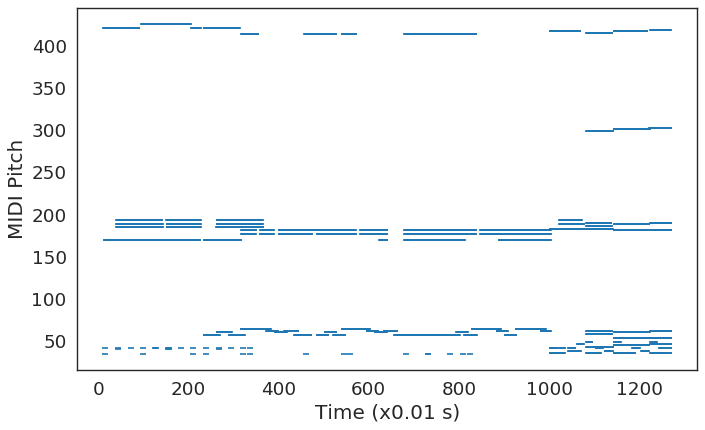

In [67]:
# output_X_test = np.argwhere(X_test>0)
# plot_data(output_X_test[:,0], output_X_test[:,1])

# output_y_test = np.argwhere(y_test>0)
# plot_data(output_y_test[:,0], output_y_test[:,1])

output_all_data = np.argwhere(all_data>0)
plot_data(output_all_data[0:5000,0], output_all_data[0:5000,1])

# output_y_all = np.argwhere(y>0)
# plot_data(output_y_all[0:20000,0], output_y_all[0:20000,1])

# output_y_pred = np.argwhere(y_pred>0)
# plot_data(output_y_pred[:,0], output_y_pred[:,1])

# fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(y_pred, '_', color='red')



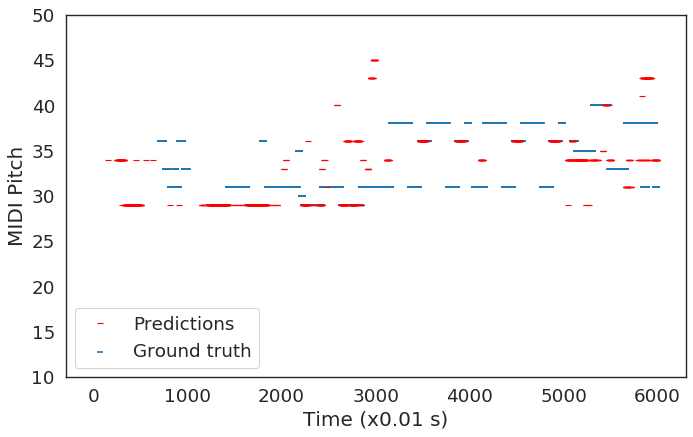

In [43]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(output_y_test[:,0], output_y_test[:,1], marker='_', label='Ground truth')
plt.plot(y_pred, '_', color='red', label='Predictions')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
plt.ylim(top=50)
plt.ylim(bottom=10)
plt.legend(loc='lower left')
plt.show()

## Bernoulli Naive Bayes 

In [28]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train_mod)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
y_pred_nb = clf.predict(X_test)

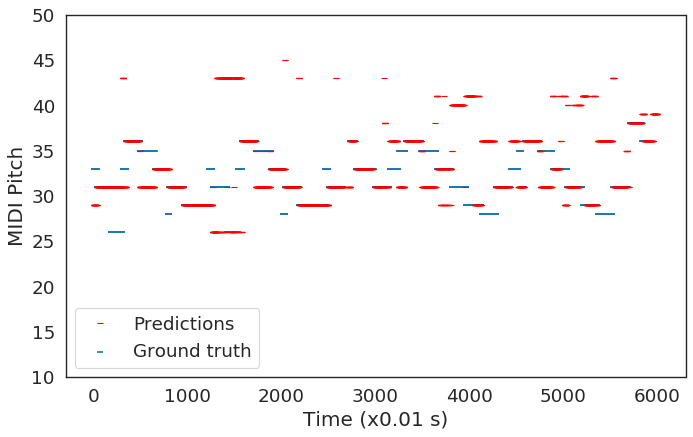

In [31]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
output_y_test = np.argwhere(y_test>0)
plt.scatter(output_y_test[0:5500,0], output_y_test[0:5500,1], marker='_', label='Ground truth')
plt.plot(y_pred_nb[0:6000], '_', color='red', label='Predictions')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
plt.ylim(top=50)
plt.ylim(bottom=10)
plt.legend(loc='lower left')
plt.show()

## Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
clf_g = GaussianNB()
clf_g.fit(X_train, y_train_mod)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred_nb_g = clf_g.predict(X_test)

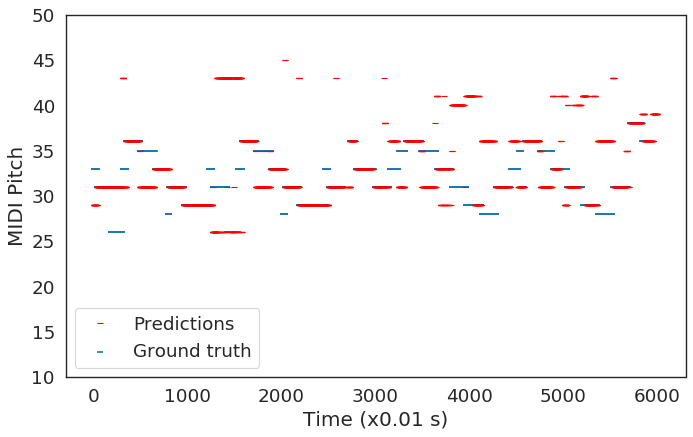

In [41]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
output_y_test = np.argwhere(y_test>0)
plt.scatter(output_y_test[0:5500,0], output_y_test[0:5500,1], marker='_', label='Ground truth')
plt.plot(y_pred_nb_g[0:6000], '_', color='red', label='Predictions')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
plt.ylim(top=50)
plt.ylim(bottom=10)
plt.legend(loc='lower left')
plt.show()

## Logistic Regression 

In [65]:
from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 1000).fit(X_train, y_train_mod)


In [66]:
y_pred_reg = clf_reg.predict(X_test)


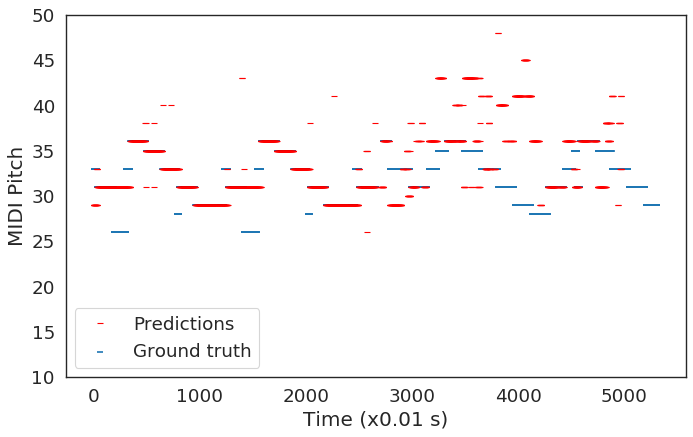

In [68]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
output_y_test = np.argwhere(y_test>0)
plt.scatter(output_y_test[0:5000,0], output_y_test[0:5000,1], marker='_', label='Ground truth')
plt.plot(y_pred_reg[0:5000], '_', color='red', label='Predictions')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
plt.ylim(top=50)
plt.ylim(bottom=10)
plt.legend(loc='lower left')
plt.show()

In [69]:
y_pred_reg_train = clf_reg.predict(X_train)


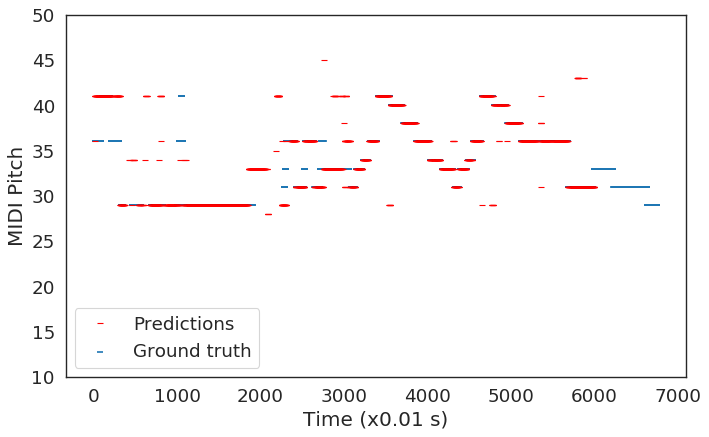

In [78]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
output_y_train = np.argwhere(y_train>0)
plt.scatter(output_y_train[0:5000,0], output_y_train[0:5000,1], marker='_', label='Ground truth')
plt.plot(y_pred_reg_train[0:6000], '_', color='red', label='Predictions')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
plt.ylim(top=50)
plt.ylim(bottom=10)
plt.legend(loc='lower left')
plt.show()